### CONTENTS

- Multiple Linear Regression
- y=b0+b1x1+b2x2+...........+bnxn
- Eg:House Price
- Polynomial Regression

***Process using sklearn***
- Read the data
- Cleaning / analysing the data
- Seperate data for dependent and inndependent
- Train/test the data
- Apply the model
- fit our training data
- Predict the data using test data
- compare actual and predicted data
- evaluation metrics

In [1]:
# read the data
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
df['MODELYEAR'].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [11]:
x = df[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]
y = df["CO2EMISSIONS"]

In [12]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)
x_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
227,22.1,15.0,18.9
1015,9.9,7.2,8.7
107,14.4,9.6,12.2
799,9.1,6.7,8.0
398,13.7,10.2,12.1
...,...,...,...
360,11.2,8.5,10.0
466,11.5,8.2,10.0
299,15.8,9.2,12.8
493,10.6,7.9,9.4


In [39]:
x_test

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
455,14.6,10.3,12.7
954,14.2,10.4,12.5
738,15.1,10.7,13.1
913,12.1,8.8,10.6
702,8.0,6.7,7.4
...,...,...,...
356,10.4,7.4,9.1
188,13.2,8.7,11.2
824,6.4,5.4,6.0
1004,15.9,12.3,14.3


In [40]:
y_train

227     435
1015    200
107     281
799     184
398     278
       ... 
360     230
466     230
299     294
493     216
527     248
Name: CO2EMISSIONS, Length: 746, dtype: int64

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_predict = model.predict(x_test)

In [44]:
model.predict([[6.0,5.8,5.9]])

array([154.17421781])

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_predict)*100

81.13564242744535

In [46]:
mean_squared_error(y_test,y_predict)**0.5

28.21932110418036

In [47]:
model.coef_

array([20.19153263,  1.70148849, -9.1409838 ])

In [48]:
model.intercept_

77.08819317963543

### Polynomial Regression

- If data is non-linear(curvilinear) we go for polynomial regression
- training data error ---> bias
- testing data error ---> varience
- data error=actual-predicted
- Underfitting
    - high bias
    - high varience
- Best Fit
    - low bias
    - low varience
- Overfitting
    - low bais
    - high varience

In [49]:
df1 = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/china_gdp.csv")
df1.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [51]:
df1.shape

(55, 2)

In [53]:
df1.isna().sum()

Year     0
Value    0
dtype: int64

In [55]:
df1['Year'].value_counts()

2014    1
1973    1
1984    1
1983    1
1982    1
1981    1
1980    1
1979    1
1978    1
1977    1
1976    1
1975    1
1974    1
1972    1
1986    1
1971    1
1970    1
1969    1
1968    1
1967    1
1966    1
1965    1
1964    1
1963    1
1962    1
1961    1
1985    1
1987    1
2013    1
2001    1
2012    1
2011    1
2010    1
2009    1
2008    1
2007    1
2006    1
2005    1
2004    1
2003    1
2002    1
2000    1
1988    1
1999    1
1998    1
1997    1
1996    1
1995    1
1994    1
1993    1
1992    1
1991    1
1990    1
1989    1
1960    1
Name: Year, dtype: int64

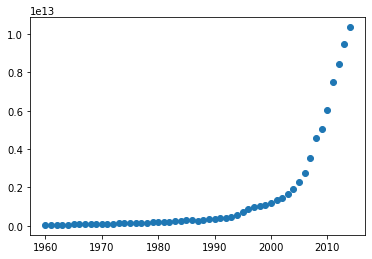

In [56]:
import matplotlib.pyplot as plt
plt.scatter(df1["Year"],df1["Value"])
plt.show()

In [67]:
x = df1["Year"].values.reshape(-1,1)
y = df1["Value"].values

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [71]:
y_pred = model.predict(x_poly)
r2_score(y,y_pred)*100

96.45101047099513

In [73]:
mean_squared_error(y,y_pred)

466683670872.34875

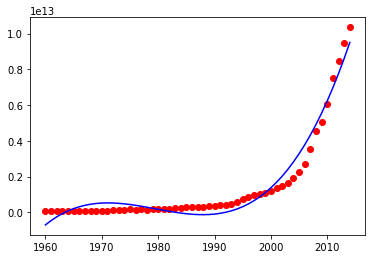

In [77]:
import matplotlib.pyplot as plt
plt.scatter(df1["Year"],df1["Value"],c="red")
plt.plot(x,y_pred,c="b")
plt.show()

In [78]:
acc = []
for i in range(2,20):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly,y)
    y_pred = model.predict(x_poly)
    acc.append(r2_score(y,y_pred)*100)

In [79]:
acc

[84.24443474171446,
 96.45101047099513,
 96.51202302091178,
 96.57218086513917,
 96.63149021179063,
 96.68995728635552,
 96.74758835386689,
 96.80438971155266,
 96.86036769366672,
 96.91552866548875,
 96.96987902287756,
 97.0234251917363,
 97.07617362690745,
 97.12813080733129,
 97.17930323898618,
 97.2296974512154,
 97.27931999532463,
 97.3281774435524]

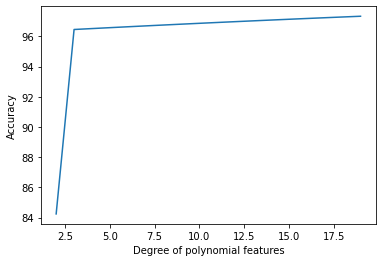

In [83]:
import numpy as np
plt.plot(np.arange(2,20),acc)
plt.xlabel("Degree of polynomial features")
plt.ylabel("Accuracy")
plt.show()